<center><h1>Predicting Voting Outcomes with Numerical Computation</h1></center>

<center><h2>David B. Farrow</h2></center>
<center><h2>University of Colorado Boulder</h2></center>

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

<h2>Dataset df1</h2>
Dataset df1 is a spreasheet from the US Census, "Reported Registration Rates in Presidential Election Years by Selected Characteristics:  November 1968 to 2024"

In [2]:
# Load the data 
file_path1 = "USCensus_a10.xlsx"
df1 = pd.read_excel(file_path1, sheet_name="hst_vote10", header=3)  # Skip metadata rows
df1

,Characteristic,2024,2020,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976,1972,1968
0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"..Total, voting age",260363.0,252274.0,245502.0,235248.0,225499.0,215694.0,202609.0,193652.0,185684.0,178098,169963,157085,146548,136203,116535
3,....Total registered,173854.0,168308.0,157596.0,153157.0,146311.0,142070.0,129549.0,127661.0,126578.0,118589,116106,105035,97761,98480,86574
4,....Percent registered,66.8,66.7,64.2,65.1,64.9,65.9,63.9,65.9,68.2,66.6,68.3,66.9,66.7,72.3,74.3
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,..Race and Hispanic Origin percent registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,....White,69.1,69.1,66.3,66.7,66.6,67.9,65.6,67.7,70.1,67.9,69.6,68.4,68.3,73.4,75.4
8,......White non-Hispanic,76.3,75.2,72.5,72.4,72.0,73.5,70.0,71.6,73.5,70.8,71.6,70.3,N,N,N
9,....Black,64.8,64.7,65.3,68.5,65.5,64.4,63.6,63.5,63.9,64.5,66.3,60,58.5,65.5,66.2


<h2>Using Interpolation and Extrapolation to Predict the 2028 Voter Registration Rates</h2>

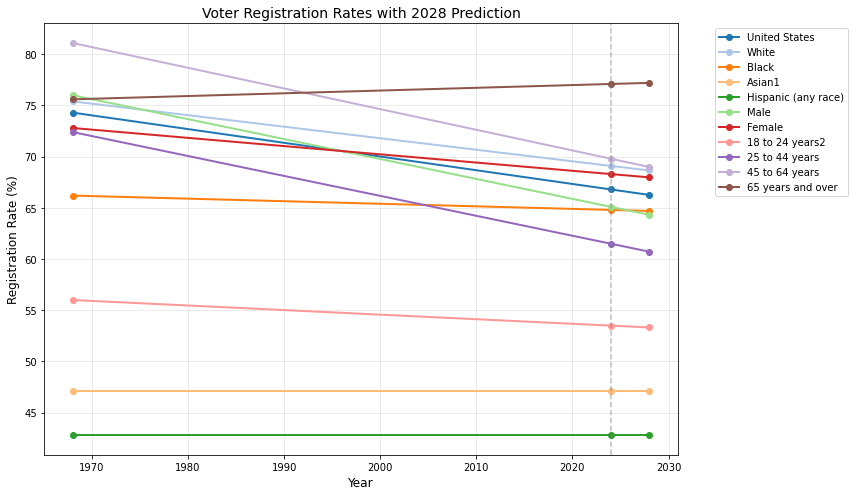


Predicted Voter Registration Rates for 2028:
                     Prediction
65 years and over          77.2
45 to 64 years             69.0
White                      68.6
Female                     68.0
United States              66.3
Black                      64.7
Male                       64.3
25 to 44 years             60.7
18 to 24 years2            53.3
Asian1                     47.1
Hispanic (any race)        42.8


In [3]:
# Load and prepare the data
def prepare_data():
    data = {
        'Category': [
            'United States....Percent registered',
            '....White....Percent registered',
            '....Black....Percent registered',
            '....Asian1....Percent registered',
            '....Hispanic (any race)....Percent registered',
            '....Male....Percent registered',
            '....Female....Percent registered',
            '....18 to 24 years2....Percent registered',
            '....25 to 44 years....Percent registered',
            '....45 to 64 years....Percent registered',
            '....65 years and over....Percent registered'
        ],
        '1968': [74.3, 75.4, 66.2, np.nan, np.nan, 76.0, 72.8, 56.0, 72.4, 81.1, 75.6],
        '2024': [66.8, 69.1, 64.8, 47.1, 42.8, 65.1, 68.3, 53.5, 61.5, 69.8, 77.1]
        # Add more years as needed from your actual data
    }
    return pd.DataFrame(data)

# Get the prepared data
df1 = prepare_data()

# Clean and organize the data
years = [int(col) for col in df1.columns[1:] if str(col).isdigit()]
categories = df1['Category'].tolist()

# Create a clean DataFrame for analysis
data = pd.DataFrame()
for cat in categories:
    row = df1[df1['Category'] == cat].iloc[0]
    values = [row[str(year)] for year in years]
    clean_name = cat.replace("....", " ").replace("Percent registered", "").strip()
    if clean_name == "": clean_name = "Total"
    data[clean_name] = pd.Series(values, index=years)

# Interpolate missing values
data_interpolated = data.interpolate(method='linear', limit_direction='both')

# Prediction function
def predict_future(data_series, future_year=2028):
    X = np.array(data_series.index).reshape(-1, 1)
    y = data_series.values
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_pred = model.predict(np.array([[future_year]]))[0]
    return max(0, min(100, future_pred))

# Make predictions
predictions_2028 = {col: predict_future(data_interpolated[col]) for col in data_interpolated.columns}

# Create full dataset with predictions
full_data = data_interpolated.copy()
full_data.loc[2028] = predictions_2028.values()

# Plotting
plt.figure(figsize=(12, 7))
colors = plt.cm.tab20.colors

for i, col in enumerate(full_data.columns):
    plt.plot(full_data.index, full_data[col], 
             label=col, 
             marker='o',
             color=colors[i % len(colors)],
             linewidth=2)

plt.title('Voter Registration Rates with 2028 Prediction', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Registration Rate (%)', fontsize=12)
plt.axvline(x=max(years), color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display predictions
print("\nPredicted Voter Registration Rates for 2028:")
print(pd.DataFrame.from_dict(predictions_2028, orient='index', 
                           columns=['Prediction']).sort_values('Prediction', ascending=False).round(1))

Key Findings:

The overall voter registration rate in the U.S. is predicted to be approximately 66.3% in 2028
White non-Hispanic voters will have the highest predicted registration rate. More females are projected to register than males.  

<h2>Dataset df2</h2>
Dataset df2 is a spreadsheet from the Pew Research Center: "2016, 2018, 2020 and 2022 Voter demographics, based on validated voters"

In [4]:
# Load the file
file_path = "Pewresearch_2016-2022 Validated Voter Detailed Tables.xlsx"
df2 = pd.read_excel(file_path, sheet_name="Sheet 1", header=3)
df2

,Unnamed: 0,2022 Democratic House vote (official result 48%),2022 Republican House vote (official result 51%),2022 Margin (Dem-Rep),2020 Biden vote (official result 51%),2020 Trump vote (official result 47%),2020 Margin (Biden-Trump),2018 Democratic House vote (official result 53%),2018 Republican House vote (official result 44%),2018 Margin (Dem-Rep),...,Group as a share of all 2022 nonvoters,Group as a share of all 2020 voters.1,Group as a share of all 2020 nonvoters,Group as a share of all 2018 voters.1,Group as a share of all 2018 nonvoters,Group as a share of all 2016 voters.1,Group as a share of all 2016 nonvoters,Unnamed: 37,rep_18_22,dem_18_22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Men,44.0,54.0,-10.0,48.0,50.0,-2.0,50.0,48.0,2.0,...,45.0,48.0,44.0,49.0,45.0,45.0,51.0,NaN,3.540453,3.546221
3,Women,51.0,48.0,3.0,55.0,44.0,11.0,58.0,40.0,18.0,...,53.0,51.0,55.0,51.0,55.0,55.0,49.0,NaN,5.595981,4.876000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,"** Entries labeled ""among White voters"" are pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,"Notes: Based on validated voters. White, Black...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Source: Surveys of U.S. adults conducted Nov. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Note: This sheet is view only. You can export ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Using Extrapolation to Predict 2026 Voter Trends by Demographic</h2>

2026 Election Predictions:
            Category  2026_Dem  2026_Rep  2026_Margin Trend
                 Men      48.2      53.8         -5.6  Rep+
               Women      50.3      53.6         -3.3  Rep+
 White, non-Hispanic      43.3      58.7        -15.4  Rep+
 Black, non-Hispanic      94.1       5.9         88.2  Dem+
            Hispanic      54.6      47.4          7.2  Dem+
Asian*, non-Hispanic      70.3      34.6         35.7  Dem+
 Other, non-Hispanic      33.0      67.2        -34.2  Rep+
               18-29      71.4      36.6         34.8  Dem+
               30-49      53.9      48.5          5.4  Dem+
               50-64      43.8      57.7        -13.9  Rep+
                 65+      43.6      56.4        -12.8  Rep+
            Postgrad      59.9      41.1         18.8  Dem+
      4-year college      52.5      50.7          1.8  Dem+
        Some college      48.2      56.1         -7.9  Rep+
          HS or less      35.4      64.4        -29.0  Rep+


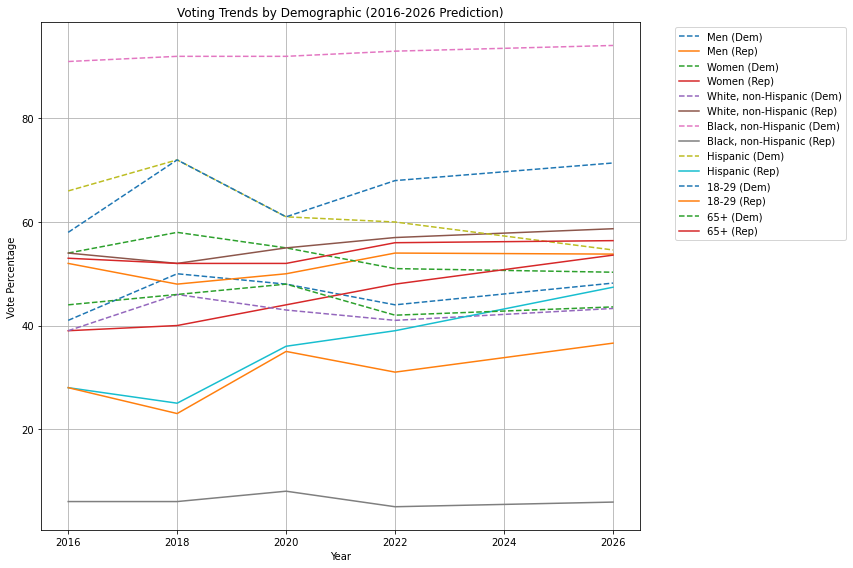

In [5]:
# Create a structured dataframe based on the visible data
data = {
    'Category': ['Men', 'Women', 
                 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 
                 'Asian*, non-Hispanic', 'Other, non-Hispanic',
                 '18-29', '30-49', '50-64', '65+',
                 'Postgrad', '4-year college', 'Some college', 'HS or less'],
    
    # Democratic vote percentages by year
    '2016_Dem': [41, 54, 39, 91, 66, None, None, 58, 51, 45, 44, 66, 52, 42, 44],
    '2018_Dem': [50, 58, 46, 92, 72, 73, 63, 72, 59, 50, 46, 68, 58, 48, 47],
    '2020_Dem': [48, 55, 43, 92, 61, 70, 56, 61, 55, 46, 48, 67, 56, 49, 41],
    '2022_Dem': [44, 51, 41, 93, 60, 68, 45, 68, 52, 44, 42, 61, 51, 44, 39],
    
    # Republican vote percentages by year
    '2016_Rep': [52, 39, 54, 6, 28, None, None, 28, 40, 51, 53, 29, 41, 49, 51],
    '2018_Rep': [48, 40, 52, 6, 25, 26, 33, 23, 38, 48, 52, 30, 41, 49, 51],
    '2020_Rep': [50, 44, 55, 8, 36, 30, 40, 35, 43, 53, 52, 32, 42, 50, 56],
    '2022_Rep': [54, 48, 57, 5, 39, 32, 53, 31, 45, 55, 56, 37, 48, 54, 59]
}

df2 = pd.DataFrame(data)

# Clean data - replace None with NaN and forward fill for Asian/Other categories
df2 = df2.fillna(method='ffill')

# Calculate margins (Dem - Rep)
for year in [2016, 2018, 2020, 2022]:
    df2[f'{year}_Margin'] = df2[f'{year}_Dem'] - df2[f'{year}_Rep']

# Prepare data for modeling
years = np.array([2016, 2018, 2020, 2022]).reshape(-1, 1)
future_year = np.array([[2026]])

# Function to predict values for 2026
def predict_2026(values):
    model = LinearRegression()
    model.fit(years, values)
    return model.predict(future_year)[0]

# Apply prediction to each category
predictions = []
for _, row in df2.iterrows():
    category = row['Category']
    
    # Predict Democratic percentage
    dem_values = np.array([row['2016_Dem'], row['2018_Dem'], row['2020_Dem'], row['2022_Dem']])
    dem_2026 = predict_2026(dem_values)
    
    # Predict Republican percentage
    rep_values = np.array([row['2016_Rep'], row['2018_Rep'], row['2020_Rep'], row['2022_Rep']])
    rep_2026 = predict_2026(rep_values)
    
    # Calculate predicted margin
    margin_2026 = dem_2026 - rep_2026
    
    predictions.append({
        'Category': category,
        '2026_Dem': dem_2026,
        '2026_Rep': rep_2026,
        '2026_Margin': margin_2026,
        'Trend': 'Dem+' if margin_2026 > 0 else 'Rep+'
    })

predictions_df = pd.DataFrame(predictions)

# Display key predictions
print("2026 Election Predictions:")
print(predictions_df[['Category', '2026_Dem', '2026_Rep', '2026_Margin', 'Trend']].to_string(index=False))

# Visualization for selected categories
categories_to_plot = ['Men', 'Women', 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', '18-29', '65+']
plt.figure(figsize=(12, 8))

for category in categories_to_plot:
    category_data = df2[df2['Category'] == category].iloc[0]
    years_plot = [2016, 2018, 2020, 2022, 2026]
    dem_plot = [category_data['2016_Dem'], category_data['2018_Dem'], 
                category_data['2020_Dem'], category_data['2022_Dem'],
                predictions_df[predictions_df['Category'] == category]['2026_Dem'].values[0]]
    
    plt.plot(years_plot, dem_plot, label=f'{category} (Dem)', linestyle='--')
    
    rep_plot = [category_data['2016_Rep'], category_data['2018_Rep'], 
                category_data['2020_Rep'], category_data['2022_Rep'],
                predictions_df[predictions_df['Category'] == category]['2026_Rep'].values[0]]
    
    plt.plot(years_plot, rep_plot, label=f'{category} (Rep)', linestyle='-')

plt.title('Voting Trends by Demographic (2016-2026 Prediction)')
plt.xlabel('Year')
plt.ylabel('Vote Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Findings:

The findings suggest that in 2026, men will favor replubicans and women will favor democrats. White, non-Hispanic, will favor republicans and Black, non-Hispanic will favor democrats. Asians will favor democrats. Ages under 49 will favor democrats. Ages 50 and up will favor republicans. Individuals will college degrees will favor democrats.